In [ ]:
import albumentations as A
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
augmentations = [
    A.HorizontalFlip(p=1),
    A.RandomBrightnessContrast(p=1),
    A.Rotate(limit=60, p=1),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=20, p=1),
]

In [ ]:
import xml.etree.ElementTree as ET

In [3]:
from google.colab import files
uploaded_files = files.upload()

Saving 4434.xml to 4434.xml


In [ ]:
image = cv2.imread("/content/4432.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
xml_file = '/content/4432.xml'

In [ ]:
# Parse the XML file
tree = ET.parse(xml_file)
root = tree.getroot()

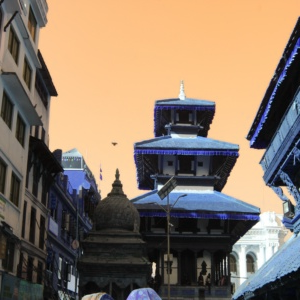

Transformed Bounding Boxes:  [(-183, 75, -39, 295, 'trailokya mohan'), (-225, 167, -146, 297, 'bhimeleshvara')]


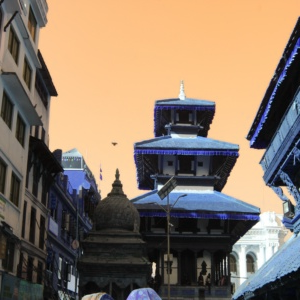

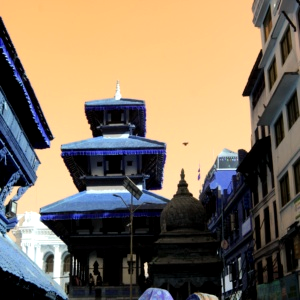

Transformed Bounding Boxes:  [[40, 75, 184, 295, 'trailokya mohan'], [147, 167, 226, 297, 'bhimeleshvara']]


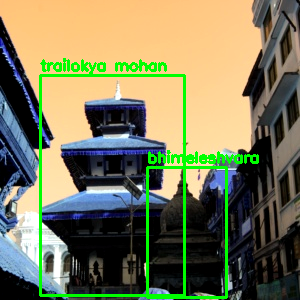

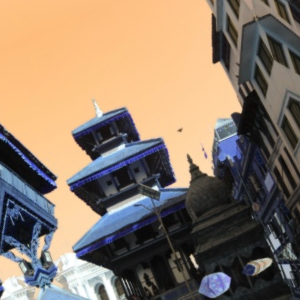

Transformed Bounding Boxes:  [(66.32767155909642, -3.9620061863760725, 285.82623479098453, 255.12382192786484, 'trailokya mohan'), (201.0561417907423, 63.80710021575182, 325.16936632200884, 214.48546302333406, 'bhimeleshvara')]


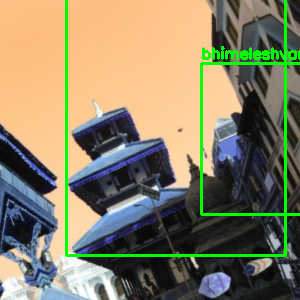

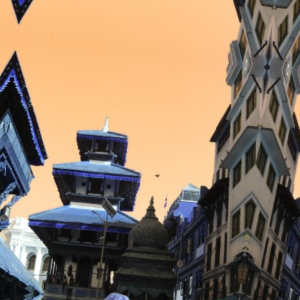

Transformed Bounding Boxes:  [(4.036304635936967, 66.86667387550068, 146.4959610617594, 265.31300329482673, 'trailokya mohan'), (93.35377508009792, 154.5288864148568, 172.43876065183258, 271.1838762322321, 'bhimeleshvara')]


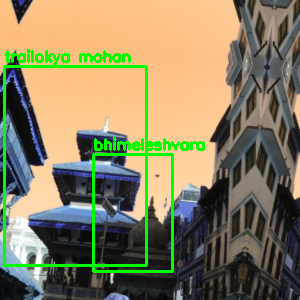

In [ ]:
bboxes = []
for object_elem in root.findall('object'):
    class_label = object_elem.find('name').text
    bndbox = object_elem.find('bndbox')
    x_min = int(bndbox.find('xmin').text)
    y_min = int(bndbox.find('ymin').text)
    x_max = int(bndbox.find('xmax').text)
    y_max = int(bndbox.find('ymax').text)
    bboxes.append([x_min, y_min, x_max, y_max, class_label])

for i, transform in enumerate(augmentations):
    transformed = transform(image=image, bboxes=bboxes)
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']
    cv2_imshow(transformed_image)
    print("Transformed Bounding Boxes: ", transformed_bboxes)

    for bbox in transformed_bboxes:
       x_min, y_min, x_max, y_max, class_label = bbox

       cv2.rectangle(transformed_image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
       cv2.putText(transformed_image, class_label, (int(x_min), int(y_min) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2_imshow(transformed_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

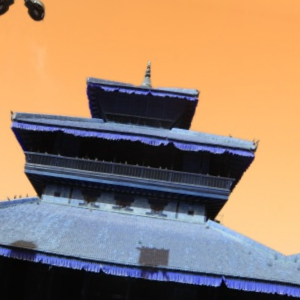

Transformed Bounding Boxes:  [(-39.797661751713214, 59.513612744760714, 284.1513929931452, 337.32090001388303, 'kasthamandap')]


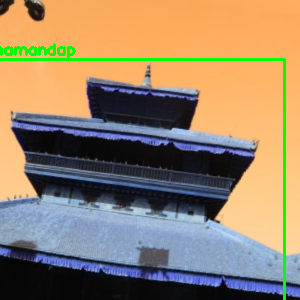

In [ ]:
import albumentations as A
import cv2
import os
import xml.etree.ElementTree as ET
from google.colab.patches import cv2_imshow

augmentation = A.Rotate(limit=60, p=1)

image = cv2.imread("/content/4445.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
xml_file = '/content/4445.xml'

# Parse the XML file
tree = ET.parse(xml_file)
root = tree.getroot()

bboxes = []
for object_elem in root.findall('object'):
    class_label = object_elem.find('name').text
    bndbox = object_elem.find('bndbox')
    x_min = int(bndbox.find('xmin').text)
    y_min = int(bndbox.find('ymin').text)
    x_max = int(bndbox.find('xmax').text)
    y_max = int(bndbox.find('ymax').text)
    bboxes.append([x_min, y_min, x_max, y_max, class_label])
    # cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
    # cv2.putText(image, class_label, (int(x_min), int(y_min) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # cv2_imshow(image)

transformed = augmentation(image=image, bboxes=bboxes)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
cv2_imshow(transformed_image)
print("Transformed Bounding Boxes: ", transformed_bboxes)

for bbox in transformed_bboxes:
    x_min, y_min, x_max, y_max, class_label = bbox

    cv2.rectangle(transformed_image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
    cv2.putText(transformed_image, class_label, (int(x_min), int(y_min) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2_imshow(transformed_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


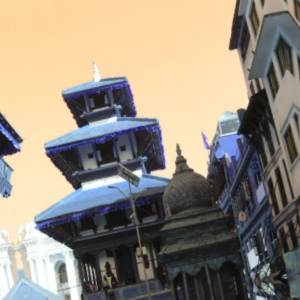

Transformed Bounding Boxes:  [(2.82945906271439, 43.15853688087234, 201.32747838470218, 300.0), (133.53405201384103, 131.46920610373584, 254.70093864569424, 300.0)]


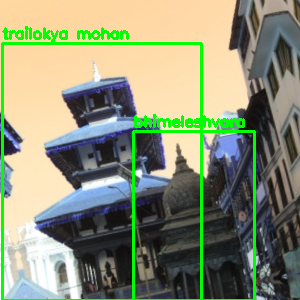

In [5]:
import albumentations as A
import cv2
import os
import xml.etree.ElementTree as ET
from google.colab.patches import cv2_imshow

augmentation = A.Compose([
    A.Rotate(limit=20, p=1),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_id']))

image = cv2.imread("/content/4434.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
xml_file = '/content/4434.xml'

# Parse the XML file
tree = ET.parse(xml_file)
root = tree.getroot()

bboxes = []
class_labels = []
for object_elem in root.findall('object'):
    class_label = object_elem.find('name').text
    bndbox = object_elem.find('bndbox')
    x_min = int(bndbox.find('xmin').text)
    y_min = int(bndbox.find('ymin').text)
    x_max = int(bndbox.find('xmax').text)
    y_max = int(bndbox.find('ymax').text)
    bboxes.append([x_min, y_min, x_max, y_max])
    class_labels.append(class_label)


transformed = augmentation(image=image, bboxes=bboxes, category_id=class_labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
cv2_imshow(transformed_image)
print("Transformed Bounding Boxes: ", transformed_bboxes)

for bbox, class_label in zip(transformed_bboxes, class_labels):
    x_min, y_min, x_max, y_max = bbox

    cv2.rectangle(transformed_image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
    cv2.putText(transformed_image, class_label, (int(x_min), int(y_min) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2_imshow(transformed_image)

cv2.waitKey(0)
cv2.destroyAllWindows()
